In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('../../FinalDatasets/finalDataset.csv')

# Print the first 5 rows to confirm it loaded correctly
print("Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

Dataset loaded successfully. Here are the first 5 rows:
              DateTime  Year  Month  Day  Hour DaySegments  \
0  2023-01-01 00:00:00  2023      1    1     0  Late Night   
1  2023-01-01 01:00:00  2023      1    1     1  Late Night   
2  2023-01-01 02:00:00  2023      1    1     2  Late Night   
3  2023-01-01 03:00:00  2023      1    1     3  Late Night   
4  2023-01-01 04:00:00  2023      1    1     4  Late Night   

   DaySegments_Afternoon  DaySegments_Early Morning  DaySegments_Evening  \
0                      0                          0                    0   
1                      0                          0                    0   
2                      0                          0                    0   
3                      0                          0                    0   
4                      0                          0                    0   

   DaySegments_Late Night  ...  WindDir  SeaLevelPressure  CloudCover  \
0                       1  ...     0.49  

In [3]:
# Select only columns with numerical data
numerical_df = df.select_dtypes(include=np.number)

# Create a list of columns to drop
columns_to_drop = [
    'Year', 'Month', 'Day', 'Hour',
    'DaySegments_Afternoon', 'DaySegments_Early Morning', 'DaySegments_Evening',
    'DaySegments_Late Night', 'DaySegments_Midday', 'DaySegments_Morning',
    'DaySegments_Night', 'Season_Autumn', 'Season_Rainy', 'Season_Summer',
    'Season_Winter'
]

# Drop the specified columns
numerical_df = numerical_df.drop(columns=columns_to_drop)

print("\nThese are the features we will use for clustering:")
print(numerical_df.columns.tolist())


These are the features we will use for clustering:
['Temp', 'FeelsLike', 'Dew', 'Humidity', 'Precip', 'PrecipProb', 'Windgust', 'WindSpeed', 'WindDir', 'SeaLevelPressure', 'CloudCover', 'UVIndex', 'SevereRisk', 'Visibility', 'SolarRadiation', 'SolarEnergy']


In [4]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(numerical_df)

print("\nData has been successfully scaled.")


Data has been successfully scaled.



Elbow plot has been generated and saved as 'elbow_plot.png'.


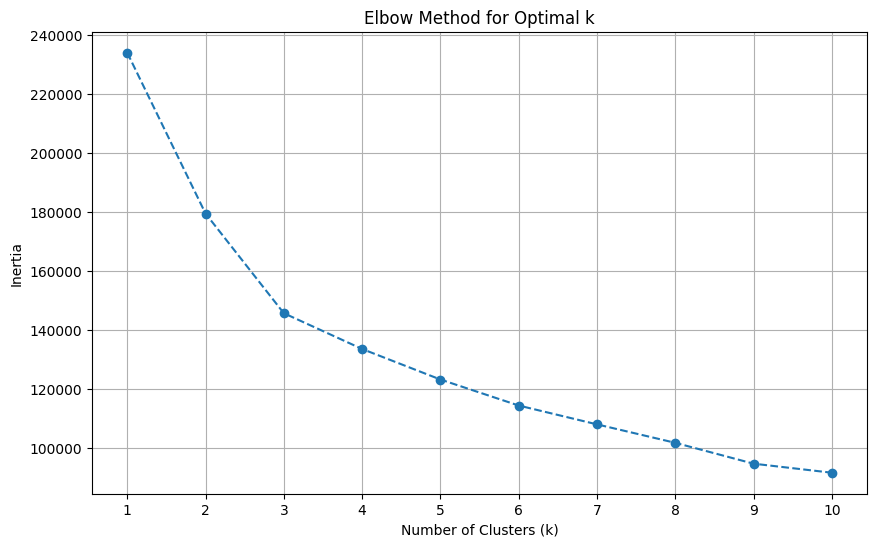

In [5]:
# Calculate inertia for a range of k values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
#plt.savefig('elbow_plot.png')

print("\nElbow plot has been generated and saved as 'elbow_plot.png'.")

In [6]:
# Set the number of clusters
k = 4

# Run K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add the new 'Cluster' column to the original DataFrame
df['Cluster'] = kmeans.labels_

print(f"\nSuccessfully applied K-Means with {k} clusters.")
print("A 'Cluster' column has been added to the DataFrame.")


Successfully applied K-Means with 4 clusters.
A 'Cluster' column has been added to the DataFrame.



Cluster visualization saved as 'kmeans_clusters_pca.png'.


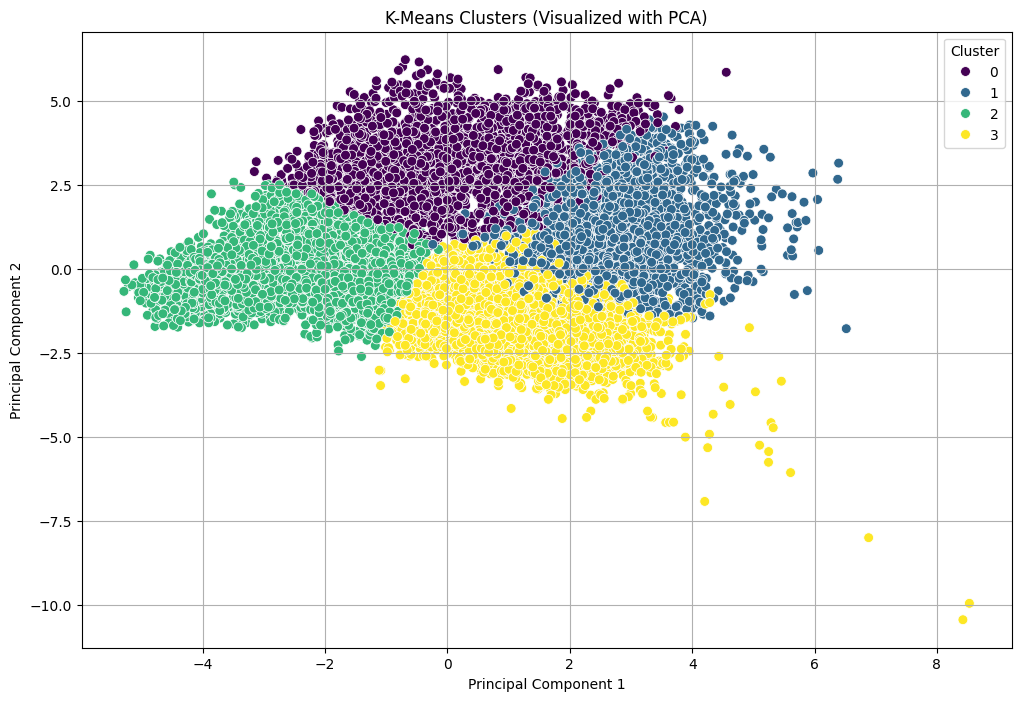

In [7]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('K-Means Clusters (Visualized with PCA)')
plt.legend(title='Cluster')
plt.grid(True)
#plt.savefig('kmeans_clusters_pca.png')

print("\nCluster visualization saved as 'kmeans_clusters_pca.png'.")

In [8]:
# Group by cluster and calculate the mean of the features
cluster_analysis = df.groupby('Cluster')[numerical_df.columns].mean()

print("\n--- Cluster Analysis ---")
print("Average weather characteristics for each cluster:")
print(cluster_analysis)


--- Cluster Analysis ---
Average weather characteristics for each cluster:
              Temp  FeelsLike        Dew   Humidity    Precip  PrecipProb  \
Cluster                                                                     
0        29.114615  30.454705  17.460629  51.821732  0.001621    0.778234   
1        31.829413  39.053484  25.045493  68.735362  0.256178   42.107235   
2        22.214732  22.500033  16.512064  71.642709  0.007349    2.580288   
3        28.748978  33.440235  24.347170  78.316669  0.340261   33.709825   

          Windgust  WindSpeed     WindDir  SeaLevelPressure  CloudCover  \
Cluster                                                                   
0        12.716095   8.602947  218.955145       1012.051476   29.654966   
1        19.426174  12.268873  157.146742       1003.398371   74.408239   
2        10.239442   3.498483  141.549708       1013.824280   33.023361   
3        24.127939  10.308013  151.186286       1003.583231   74.094098   

          

In [25]:
# Save the final DataFrame to a new CSV file
df.to_csv('finalDataset_with_clusters.csv', index=False)

print("\nPipeline complete. The final dataset with cluster labels has been saved as 'finalDataset_with_clusters.csv'.")


Pipeline complete. The final dataset with cluster labels has been saved as 'finalDataset_with_clusters.csv'.


Generating bar chart visualization...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"C{j}" for j in range(4)]) # Set concise x-tick labels
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"C{j}" for j in range(4)]) # Set concise x-tick labels
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"C{j}" for j in range(4)]) # Set concise x-tick labels
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after 

Saved 'cluster_comparison_barchart.png'

Generating radar chart visualization...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:112: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:112: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:112: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:113: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_comparison_radarchart.png')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\4187294803.py:113: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_comparison_radarchart.png')
C:\Users\Lenovo\AppData\Local\Te

Saved 'cluster_comparison_radarchart.png'


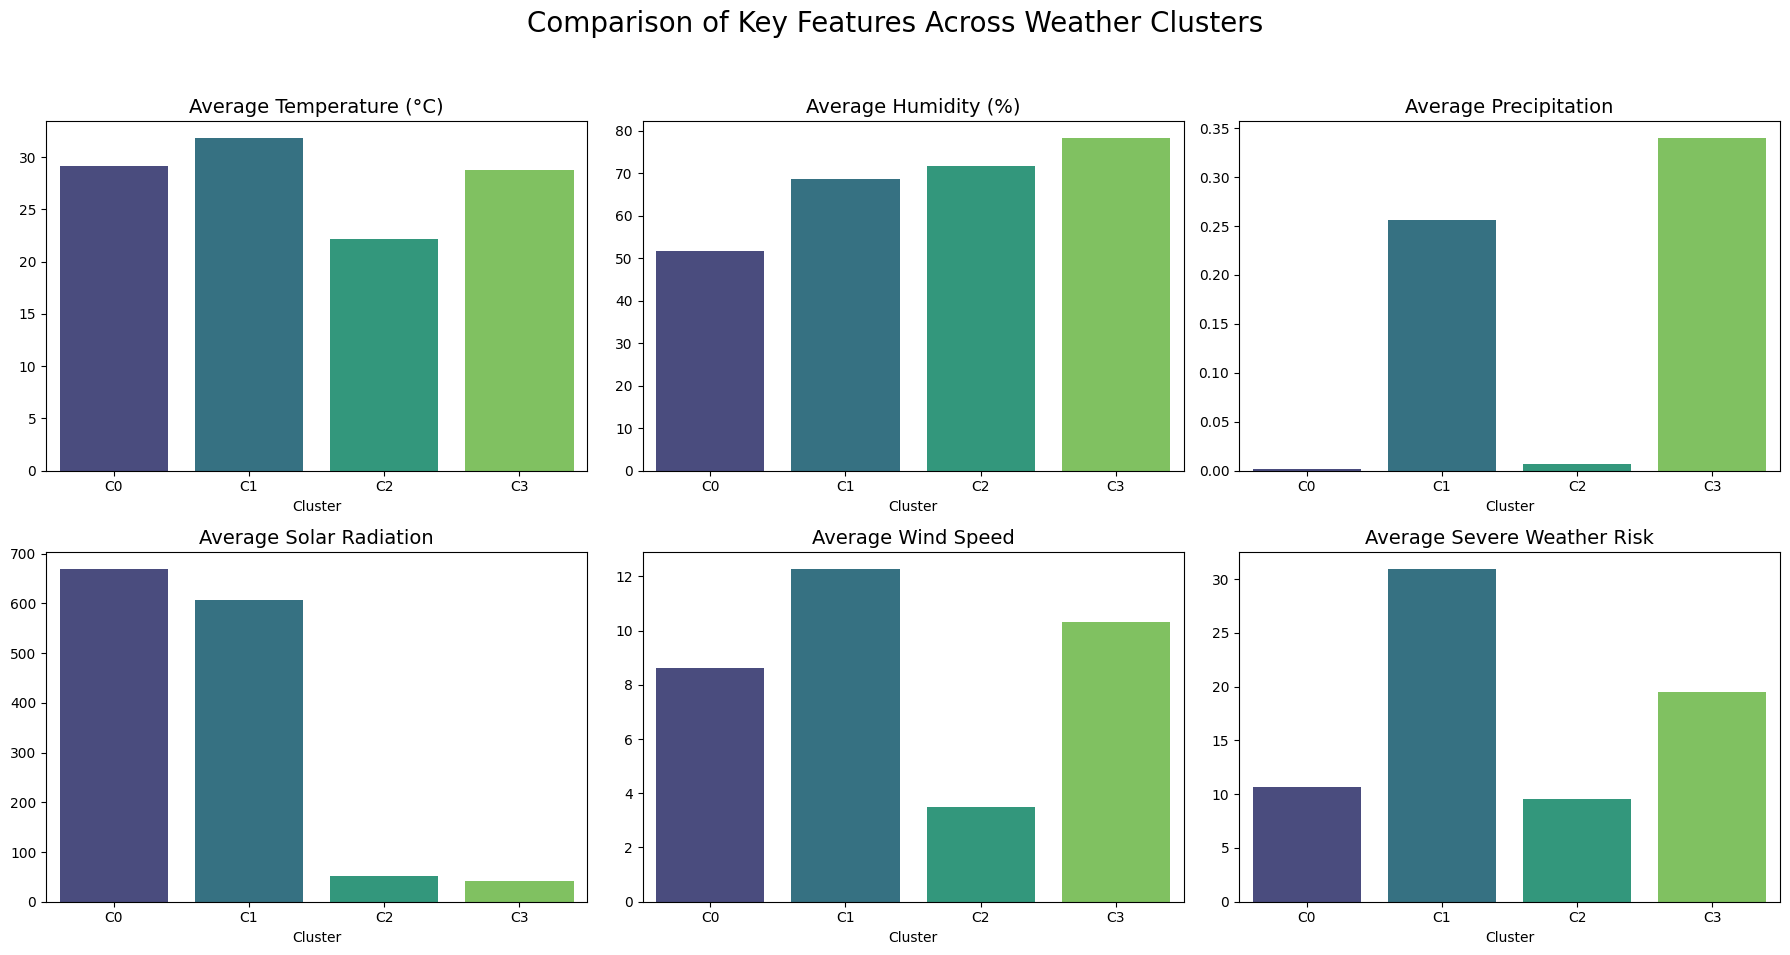

d:\CSE445_project\WeatherAnalysisDhaka\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\CSE445_project\WeatherAnalysisDhaka\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\CSE445_project\WeatherAnalysisDhaka\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


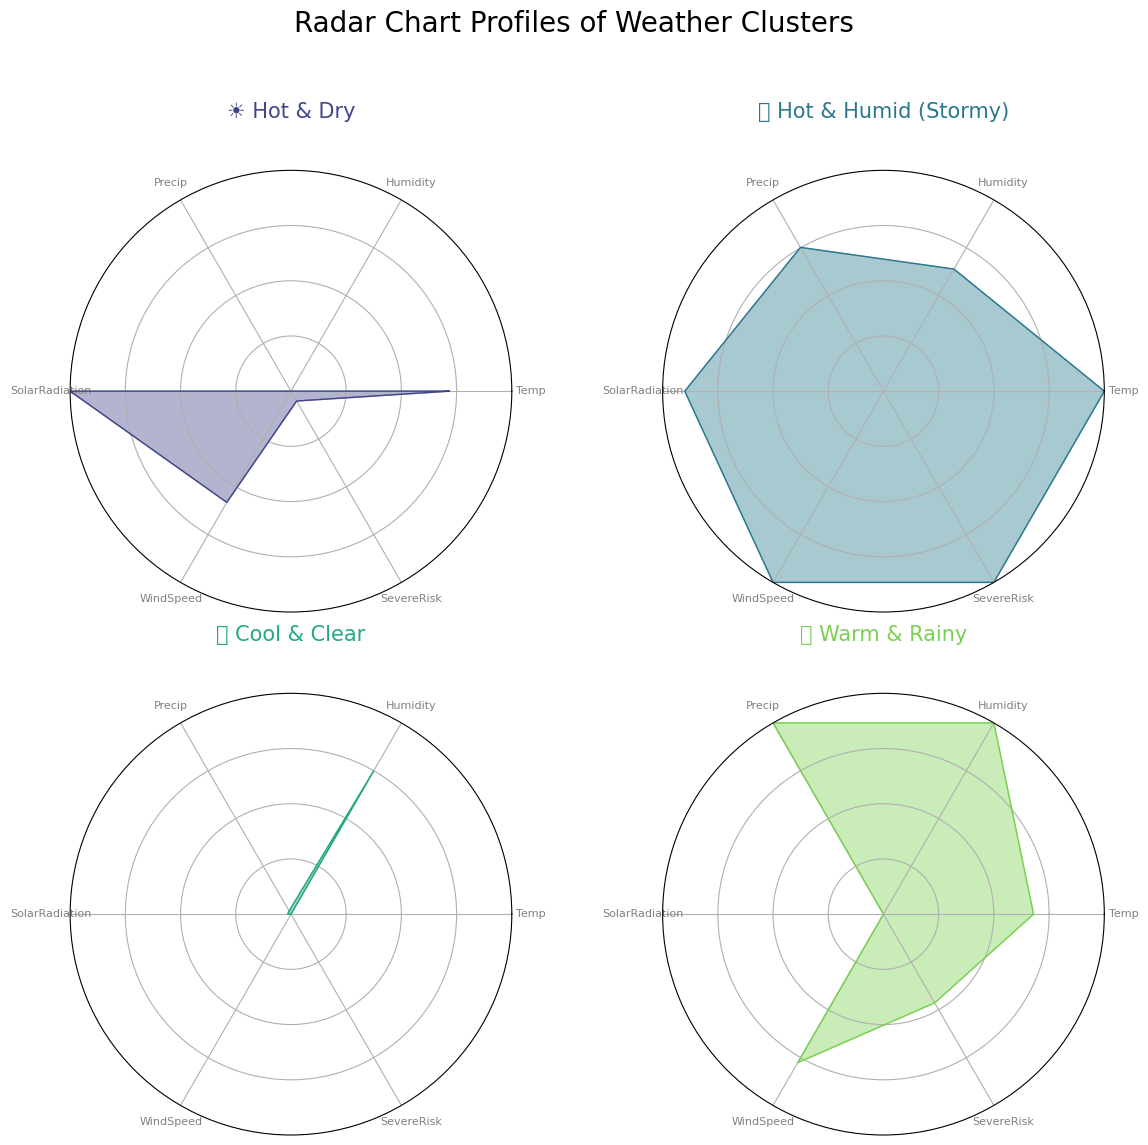

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# --- 1. Setup the Cluster Data ---
# This data is the output from our K-Means analysis, showing the
# average feature values for each of the four clusters.
data = {
    'Temp': [29.11, 31.83, 22.21, 28.75],
    'FeelsLike': [30.45, 39.05, 22.50, 33.44],
    'Dew': [17.46, 25.05, 16.51, 25.35],
    'Humidity': [51.82, 68.74, 71.64, 78.32],
    'Precip': [0.0016, 0.256, 0.0073, 0.340],
    'PrecipProb': [0.78, 42.11, 2.58, 33.71],
    'Windgust': [12.72, 19.43, 10.24, 24.13],
    'WindSpeed': [8.60, 12.27, 3.50, 10.31],
    'WindDir': [218.96, 157.15, 141.55, 151.19],
    'SeaLevelPressure': [1012.05, 1003.40, 1013.82, 1003.58],
    'CloudCover': [29.65, 74.41, 33.02, 74.09],
    'UVIndex': [6.69, 6.07, 0.49, 0.40],
    'SevereRisk': [10.68, 30.94, 9.58, 19.49],
    'Visibility': [4.35, 4.88, 3.80, 4.68],
    'SolarRadiation': [669.41, 606.58, 51.35, 41.84],
    'SolarEnergy': [2.41, 2.18, 0.18, 0.15]
}
cluster_names = {
    0: '☀️ Hot & Dry',
    1: '🔥 Hot & Humid (Stormy)',
    2: '🌙 Cool & Clear',
    3: '🌧️ Warm & Rainy'
}

cluster_analysis_df = pd.DataFrame(data)
cluster_analysis_df['Cluster_Name'] = cluster_analysis_df.index.map(cluster_names)


# --- 2. Create Bar Chart Visualization ---
print("Generating bar chart visualization...")
# Select the most important features for comparison
features_to_plot = ['Temp', 'Humidity', 'Precip', 'SolarRadiation', 'WindSpeed', 'SevereRisk']
titles = [
    'Average Temperature (°C)', 'Average Humidity (%)', 'Average Precipitation',
    'Average Solar Radiation', 'Average Wind Speed', 'Average Severe Weather Risk'
]

# Get a color palette
palette = sns.color_palette('viridis', n_colors=4)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Flatten the 2x3 array for easy iteration

for i, feature in enumerate(features_to_plot):
    # The 'hue' parameter links the color to the cluster index
    sns.barplot(x=cluster_analysis_df.index, y=cluster_analysis_df[feature], ax=axes[i], palette=palette, hue=cluster_analysis_df.index)
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_ylabel('') # Remove y-axis label for cleaner look
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_xticklabels([f"C{j}" for j in range(4)]) # Set concise x-tick labels
    axes[i].get_legend().remove() # Remove legend from each subplot

plt.suptitle('Comparison of Key Features Across Weather Clusters', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cluster_comparison_barchart.png')
print("Saved 'cluster_comparison_barchart.png'")


# --- 3. Create Radar Chart Visualization ---
print("\nGenerating radar chart visualization...")

# Number of variables
categories = features_to_plot
N = len(categories)

# Set the angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Repeat the first angle to close the circle

# Create a 2x2 grid for radar charts
fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

for i, (idx, row) in enumerate(cluster_analysis_df.iterrows()):
    # Min-Max scaling for visualization purposes so all features fit on the same chart
    normalized_values = (cluster_analysis_df[categories].loc[idx] - cluster_analysis_df[categories].min()) / (cluster_analysis_df[categories].max() - cluster_analysis_df[categories].min())
    normalized_values = normalized_values.tolist()
    normalized_values += normalized_values[:1] # Close the circle

    ax = axes[i]

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.25, 0.5, 0.75], ["", "", ""], color="grey", size=7)
    ax.set_ylim(0, 1)

    # Plot data
    ax.plot(angles, normalized_values, linewidth=1, linestyle='solid', color=palette[i])

    # Fill area
    ax.fill(angles, normalized_values, color=palette[i], alpha=0.4)

    # Add a title
    ax.set_title(row['Cluster_Name'], size=15, color=palette[i], y=1.1)

plt.suptitle('Radar Chart Profiles of Weather Clusters', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cluster_comparison_radarchart.png')
print("Saved 'cluster_comparison_radarchart.png'")